In [1]:
# importing the required packages

import pandas as pd

import numpy as np

In [2]:
# Reading The Data 

df = pd.read_fwf("brain_body.txt")

df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [3]:
df.shape

(62, 2)

In [4]:
# Data Jar

# first clean the data

In [5]:
# Checking Missing Values

df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [6]:
# Duplicates in The Data

df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [7]:
# Wheather there is any outliers in the data

df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [8]:
# To Check The Outliers (IQR)

iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)

upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)

lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)

upper_threshold

119.60625

In [9]:
lower_threshold

-70.80375000000001

In [39]:
# outlier present in the data
# By using the clip function we are treating the outlier

df.Brain = df.Brain.clip(-70 , 119)

AttributeError: 'DataFrame' object has no attribute 'Brain'

In [11]:
# Wheather the Data in the right format or not

df.dtypes

Brain    float64
Body     float64
dtype: object

In [12]:
# Wheather the Data is structured or not (rows and column)

df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,119.000,423.0
4,36.330,119.5


In [13]:
# Exploratory Data Analysis (EDA)

# To plot the data we import the required package

import matplotlib.pyplot as plt

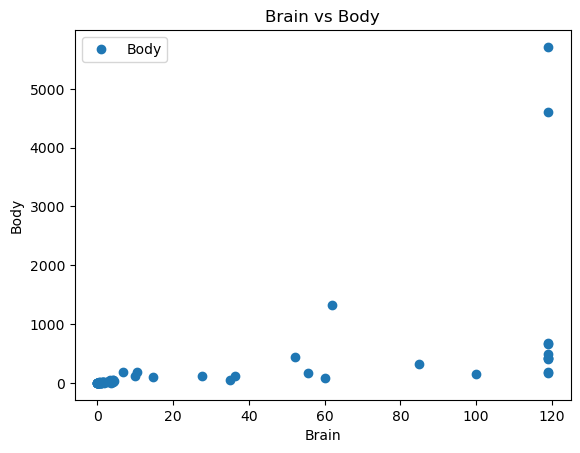

In [14]:
df.plot(x = 'Brain' , y = 'Body', style = 'o')

plt.title("Brain vs Body")

plt.xlabel('Brain')

plt.ylabel('Body')

plt.show()

In [15]:
# To Check there is any linear relationship between the feature and target

df.corr() # There is good correleation of 0.5

,Brain,Body
Brain,1.00000,0.51026
Body,0.51026,1.00000


In [38]:
df.Brain.values

AttributeError: 'DataFrame' object has no attribute 'Brain'

In [16]:
# 2. Encode The Data

# There is NO Categorical Data
# We dont need to encode the data

In [17]:
# 3. Split The Data

X =  df.loc[ : , ["Brain"]].values #Splitting all rows and Feature as Array

y = df.loc[ : , "Body"].values #Splitting all rows and target variable as Array

# Importing The Required Package To Split and Train The Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [18]:
y_test

array([5.600e+01, 1.750e+01, 1.750e+02, 1.230e+01, 1.210e+01, 2.400e+00,
       8.100e+01, 4.060e+02, 1.790e+02, 1.795e+02, 5.040e+01, 1.250e+01,
       1.230e+01, 3.000e+00, 4.230e+02, 3.300e-01, 1.150e+02, 4.900e+02,
       2.560e+01])

In [19]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

In [20]:
# 4. Scale The Data
# to scale the data the we import the required package

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # initilize the scaler function

scaler.fit(X_train) # Here we are finding The Mean and SD From The Data

X_train = scaler.transform(X_train) # With the Mean and SD We are scaling the Training Data

X_test = scaler.transform(X_test) # scaling the test data

In [21]:
X_test

array([[ 0.12954142],
       [-0.60917187],
       [ 0.58037864],
       [-0.59619656],
       [-0.58520053],
       [-0.62808504],
       [ 0.67934291],
       [ 1.97687443],
       [-0.49063467],
       [-0.40816445],
       [-0.5470443 ],
       [-0.60939179],
       [-0.62368663],
       [-0.63749765],
       [ 1.97687443],
       [-0.63912506],
       [-0.42026008],
       [ 1.97687443],
       [-0.56760688]])

In [22]:
# Task_Jar

#In Supervised_Learning
# We are finding this model as Linear_Regression

In [23]:
# Model_Jar

# Algorithm For This Model IS Body(Y) = m * Brain(x) + c

# We are importing the Required Packages

from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # initializing the model

regressor.fit(X_train , y_train) # Learning Happens GD is we get the final values of M and C

LinearRegression()

In [24]:
regressor.coef_

array([608.78436374])

In [25]:
regressor.intercept_

355.84627906976743

In [26]:
regressor.predict([[5]])

array([3399.76809777])

In [27]:
# Learning_jar

# Getting The Best Values of M and C

In [28]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

y_pred

array([ 4.34709067e+02, -1.50080316e+01,  7.09171720e+02, -7.10886254e+00,
       -4.14651489e-01, -2.65220746e+01,  7.69419620e+02,  1.55933652e+03,
        5.71555636e+01,  1.07362146e+02,  2.28142609e+01, -1.51419158e+01,
       -2.38443902e+01, -3.22523193e+01,  1.55933652e+03, -3.32430625e+01,
        9.99985143e+01,  1.55933652e+03,  1.02960862e+01])

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df

,Actual,Predicted
0,56.00,434.709067
1,17.50,-15.008032
2,175.00,709.171720
3,12.30,-7.108863
4,12.10,-0.414651
5,2.40,-26.522075
6,81.00,769.419620
7,406.00,1559.336524
8,179.00,57.155564
9,179.50,107.362146


In [37]:
regressor.predict([[0.555]]) # perils of extrapolation

array([693.72160095])

In [31]:
# Evaluation_jar
# Finding the R^2 value

# importing the required package
from sklearn import metrics # metrics will contain all metrics

df1 = pd.DataFrame([{"R^2_Score" : metrics.r2_score(y_test , y_pred)}])

df1


,R^2_Score
0,-9.704911


In [32]:
# Another Method Finding The R2 Score

regressor.score(X_test , y_test)

-9.704910799969511